## HW03 Code


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [2]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [3]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    
    # TP = model says true, reality is true
    isTP = np.logical_and(np.equal(ytrue_N, 1), np.equal(yhat_N, 1))
    isTN = np.logical_and(np.equal(ytrue_N, 0), np.equal(yhat_N, 0))
    isFP = np.logical_and(np.equal(ytrue_N, 0), np.equal(yhat_N, 1))
    isFN = np.logical_and(np.equal(ytrue_N, 1), np.equal(yhat_N, 0))
    TP = np.sum(isTP)
    TN = np.sum(isTN)
    FP = np.sum(isFP)
    FN = np.sum(isFN)

    return TP, TN, FP, FN

#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [4]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(np.int64(0), np.int64(0), np.int64(10), np.int64(0))

In [5]:
calc_TP_TN_FP_FN(all1, all0)

(np.int64(0), np.int64(0), np.int64(0), np.int64(10))

In [6]:
calc_TP_TN_FP_FN(all1, all1)

(np.int64(10), np.int64(0), np.int64(0), np.int64(0))

In [7]:
calc_TP_TN_FP_FN(all0, all0)

(np.int64(0), np.int64(10), np.int64(0), np.int64(0))

In [8]:
# simple input to test all 4 cases
test_true = np.array([0, 1, 0, 1, 0, 1])
test_pred = np.array([1, 0, 0, 1, 1, 0])
calc_TP_TN_FP_FN(test_true, test_pred)

(np.int64(1), np.int64(1), np.int64(2), np.int64(2))

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [9]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [10]:
cancer_frac_train = np.sum(y_train) / len(y_train)
cancer_frac_test = np.sum(y_test) / len(y_test)
print("Fraction of data that has_cancer on TRAIN: %.3f" % cancer_frac_train)
print("fraction of data that has_cancer on TEST : %.3f" % cancer_frac_test)

Fraction of data that has_cancer on TRAIN: 0.140
fraction of data that has_cancer on TEST : 0.139


### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [11]:
def always_zero_classifier(x_test):
    """
    In the spirit of keeping up an image, the function must take in input data.
    But it only needs it to return an output of appropriate size
    """
    return np.zeros(len(x_test))

def calc_accuracy(pred, truth):

    is_correct = np.equal(pred, truth)
    num_correct = np.sum(is_correct)
    accuracy = num_correct / len(truth)

    return accuracy


has_cancer_test = always_zero_classifier(x_test)
acc_test = calc_accuracy(has_cancer_test, y_test)

has_cancer_train = always_zero_classifier(x_train)
acc_train = calc_accuracy(has_cancer_train, y_train)

print("acc on TRAIN: %.3f" % acc_train) #TODO: modify these values
print("acc on TEST : %.3f" % acc_test)

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [12]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
y_prob1 = np.zeros(len(y_test))
cm_df = calc_confusion_matrix_for_threshold(y_test, y_prob1)
print(cm_df)

Predicted    0  1
True             
0          155  0
1           25  0


#### (c) Reflect on the accuracy of the always-0 classifier.

Accuracy of the always-0 classifier is 86% on the test set. Just by insisting any random person doesn't have cancer, we will be correct 86% of the time. This accuracy is more indicative of how often cancer appears in a population than how much better we can tell who has cancer or not based on the supplied data. In other words, this accuracy doesn't even take into account the input data. We wouldn't want to use this classifier because we have good reason (biological, empirical, etc.) to believe that the supplied input data can help us make better predictions about who has cancer or not. We would therefore have reason to expect that we can do better than predicting with 86% accuracy. 

Advantages of this classifier: it's simple and fast. no need to train it, and inference is O(1) time and space complexity. it works in the majority of cases

#### (d) Analyze the various costs of using the always-0 classifier.


For False Negatives, Main cost is loss of life due to delayed treatment. A softer version would be number of years lost due to delayed treatment (e.g. maybe a patient could have lived 10 years longer if they had gotten treatment). 

There could also be money and time costs when you consider the level of treatment needed between early detection of cancer vs. late stage detection. Treating cancer late takes more time, more money, more energy. Leads to lower quality of life. 

This classifier doesn't allow for False Positives, so we don't need to analyze that. 

If your problem cares about the accuracy of False Positives, you shouldn't use this one

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

acc on TRAIN: 0.402
acc on TEST : 0.567

Predicted   0   1
True             
0          77  78
1           0  25


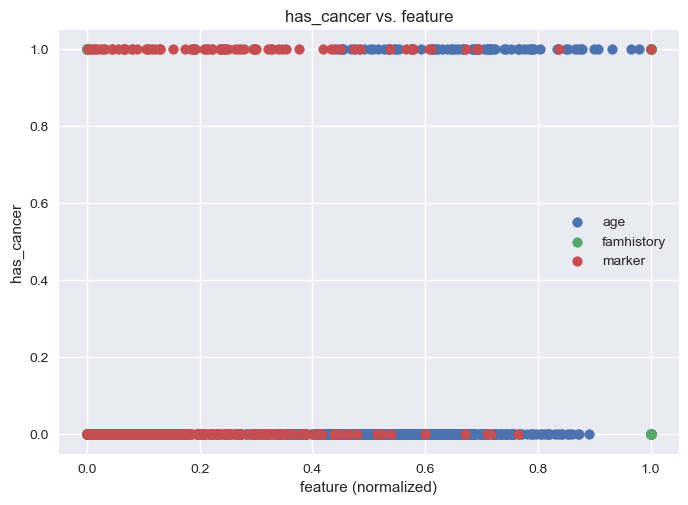

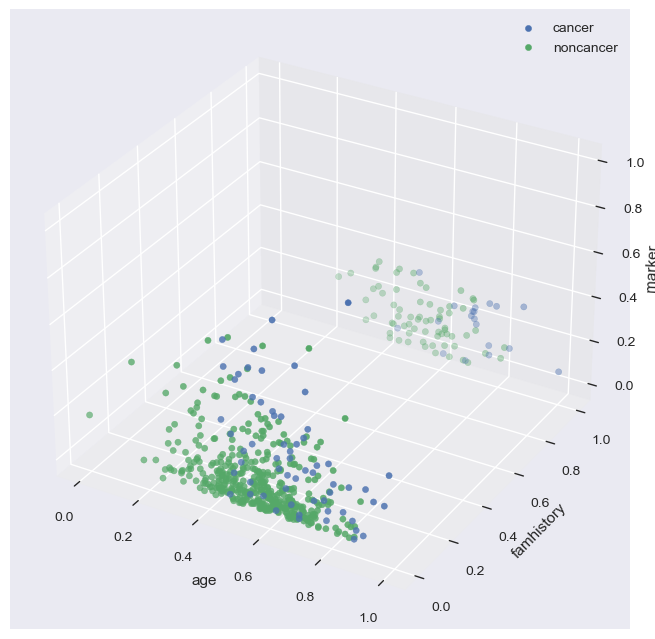

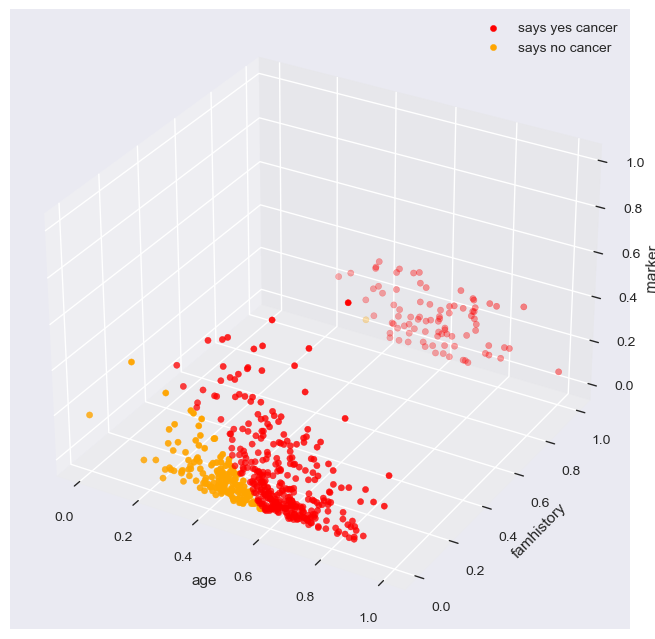

In [28]:
perceptron = sklearn.linear_model.Perceptron()
perceptron.fit(x_train, y_train)

scaler = sklearn.preprocessing.MinMaxScaler()

# scale input data to [0, 1]
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler.fit(x_test)
x_test = scaler.transform(x_test)


score_train = perceptron.score(x_train, y_train)
print("acc on TRAIN: %.3f" % score_train) #TODO: modify these values

score_test = perceptron.score(x_test, y_test)
print("acc on TEST : %.3f" % score_test)
print('')

# confusion matrix
pred = perceptron.predict(x_test)
cm_df = calc_confusion_matrix_for_threshold(y_test, pred)
print(cm_df)



# 2D plots
plt.figure()
plt.title('has_cancer vs. feature')
plt.scatter(x_train[:, 0], y_train, label='age')
plt.scatter(x_train[:, 1], y_train, label='famhistory')
plt.scatter(x_train[:, 2], y_train, label='marker')
plt.legend()
plt.xlabel('feature (normalized)')
plt.ylabel('has_cancer')


# # 3D plots
# fig = plt.figure(figsize=(8,10))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(x_train[:, 0], x_train[:, 1], y_train, label='age, famhistory')
# ax.scatter(x_train[:, 0], x_train[:, 2], y_train, label='age, marker')
# ax.scatter(x_train[:, 2], x_train[:, 0], y_train, label='marker, age')
# ax.scatter(x_train[:, 2], x_train[:, 1], y_train, label='marker, famhistory')
# ax.legend()
# ax.set_xlabel('feature 1')
# ax.set_ylabel('feature 2')
# ax.set_zlabel('has_cancer')


# 3D plot based on true labels
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.view_init(30, -60)
has_cancer = np.equal(y_train, 1)
no_cancer  = np.logical_not(has_cancer)
ax.scatter(x_train[has_cancer, 0], x_train[has_cancer, 1], x_train[has_cancer, 2], label='cancer')
ax.scatter(x_train[no_cancer, 0], x_train[no_cancer, 1], x_train[no_cancer, 2], label='noncancer')
ax.legend()
ax.set_xlabel('age')
ax.set_ylabel('famhistory')
ax.set_zlabel('marker')


# 3D plot based on predicted labels
# y_preds = x_train @ perceptron.coef_.T + perceptron.intercept_
# says_yes_cancer = np.greater_equal(y_preds, 0).reshape(-1)
# says_no_cancer  = np.less(y_preds, 0).reshape(-1)
y_preds = perceptron.predict(x_train)
says_yes_cancer = np.equal(y_preds, 1)
says_no_cancer = np.equal(y_preds, 0)
# 3D plots
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train[says_yes_cancer, 0], x_train[says_yes_cancer, 1], x_train[says_yes_cancer, 2], label='says yes cancer', color='red')
ax.scatter(x_train[says_no_cancer, 0], x_train[says_no_cancer, 1], x_train[says_no_cancer, 2], label='says no cancer', color='orange')
ax.legend()
ax.set_xlabel('age')
ax.set_ylabel('famhistory')
ax.set_zlabel('marker')

plt.show()

#### (b) Compare the `Perceptron` to the always-0 classifier.

Without using MinMaxScaler(), the performance is exactly the same. I noticed that the predictions made by the perceptron are the same as those of the always-0 classifier.

After using MinMaxScaler() to scale the input data, I get different results. The perceptron actually performs much worse than the always-0 classifier. My first thought as to why the performance is worse is because the cancer/non-cancer populations are not linearly separable. I made some 2D and 3D plots to investigate this matter. Above are 2D scatter plots of the true labels vs. a single feature and 3D plot of the cancer population vs noncancer population. It is most instructive to look at the 3D plot. By visual inspection, I find it tough to find a hyperplane that can neatly split the two populations apart. The best I can think of is a hyperplane that cuts diagonally along the age/marker axes. 

After this thought, I decided to make a 3D plot of the predictions of the trained model to see what hyperplane the perceptron decided on. It looks like the algorithm decided on a plane that's similar to what I described earlier! however, it categorizes a lot of the noncancer datapoints as cancer, which is what our accuracy numbers show.


#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [16]:
alphas = np.logspace(-5, 5, base=10, num=100)
train_accuracy_list = np.zeros_like(alphas)
test_accuracy_list = np.zeros_like(alphas)

for ii, alpha in enumerate(alphas):

    reg_perceptron = sklearn.linear_model.Perceptron(penalty='l2', alpha=alpha)
    reg_perceptron.fit(x_train, y_train)

    score_train = reg_perceptron.score(x_train, y_train)
    # print("acc on TRAIN: %.3f" % score_train) #TODO: modify these values
    
    score_test = reg_perceptron.score(x_test, y_test)
    # print("acc on TEST : %.3f" % score_test)
    # print('')

    train_accuracy_list[ii] = score_train
    test_accuracy_list[ii] = score_test

##### Plot accuracy on train/test data across the different alpha values.

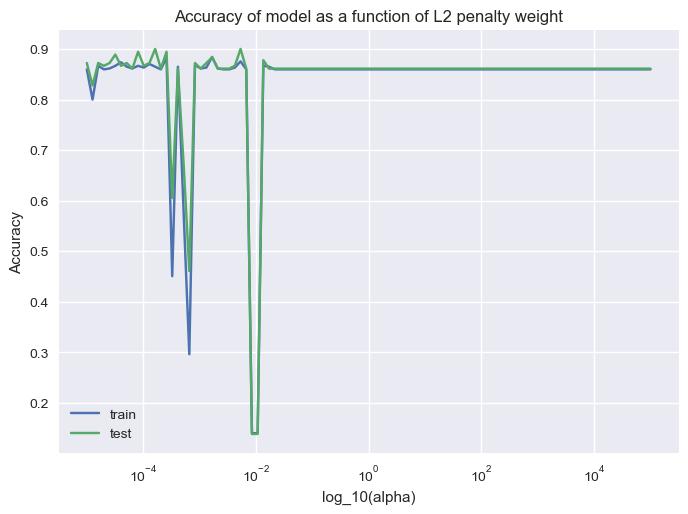

In [17]:
# TODO make plot
plt.figure()
plt.xscale('log')
plt.plot(alphas, train_accuracy_list, label='train')
plt.plot(alphas, test_accuracy_list, label='test')
plt.legend()
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');
plt.title('Accuracy of model as a function of L2 penalty weight')

plt.show()

#### (d) Discuss what the plot is showing you.

The plot is showing me that, even with l2 regularization, the performance of the perceptron is capped at that of the always-0 classifier. It makes sense to me that the accuracy flatlines after a certain alpha value. If regularization promotes parsimony, and we already know that a simple always-0 classifier works "well," then I can imagine that a high enough alpha value will force the model to converge to one that works like the always-0 classifier. I am not sure what is going on around the 10e-4 to 10e-2 region. I suspect that there is some adapting behavior going on as the model decides to place more importance on a single feature. 

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [18]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.

# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.

AUC on confidence scores: 0.8885161290322581
AUC on probalities: 0.8824516129032258


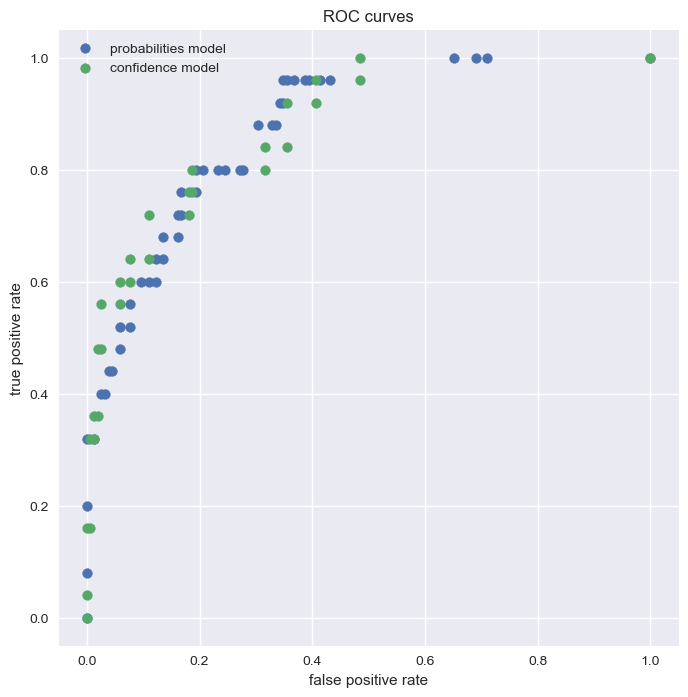

In [19]:
confidence_scores = perceptron.decision_function(x_test)

cccv = sklearn.calibration.CalibratedClassifierCV(perceptron, method='isotonic')
cccv.fit(x_train, y_train)
probs = cccv.predict_proba(x_test)

plt.figure(figsize=(8,8))
plt.title('ROC curves')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

# y_score needs to be the probabilities for the positive class
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, probs[:, 1])
auc_probs = sklearn.metrics.roc_auc_score(y_test, probs[:, 1])
plt.scatter(fpr, tpr, label='probabilities model')



fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, confidence_scores)
auc_confs = sklearn.metrics.roc_auc_score(y_test, confidence_scores)
plt.scatter(fpr, tpr, label='confidence model')


plt.legend()
print(f'AUC on confidence scores: {auc_confs}')
print(f'AUC on probalities: {auc_probs}')
plt.show()


In [20]:
print("AUC on TEST for Perceptron: %.3f" % auc_confs) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % auc_probs)

AUC on TEST for Perceptron: 0.889
AUC on TEST for probabilistic model: 0.882


#### (b) Discuss the results above

the nature of the curvature as the threshold varies is slightly different between the two models. the true positive rate seems to change at a faster rate for the probabilities model. the false positive rate has the opposite behavior: it changes slower for the probabilities model.

I think the curve of TPR and FPR of the probabilities model is smoother, judging by how tightly packed the scatter points for the probabilities model are. This could be nice if you're interested in getting a granular look at which datapoints get classified as positive as threshold varies.

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [21]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''

    # TODO: fix this
    acc = 0
    tpr = 0
    tnr = 0
    ppv = 0
    npv = 0


    cm_df = calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh)
    TP = cm_df.loc[1, 1]
    FP = cm_df.loc[0, 1]
    FN = cm_df.loc[1, 0]
    TN = cm_df.loc[0, 0]
    acc = (TP + TN) / len(ytrue_N)
    tpr = TP / (TP + FN) if TP + FN != 0 else 0
    tnr = TN / (TN + FP) if TN + FP != 0 else 0
    ppv = TP / (TP + FP) if TP + FP != 0 else 0
    npv = TN / (TN + FN) if TN + FN != 0 else 0

    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [22]:
# TODO: test different thresholds to compute these values
neg_probs = probs[:, 0]
pos_probs = probs[:, 1]

best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0  
best_PPV_threshold = 0

thresholds = np.linspace(0, 1.001, 51)
accs = np.zeros_like(thresholds)
tprs = np.zeros_like(thresholds)
tnrs = np.zeros_like(thresholds)
ppvs = np.zeros_like(thresholds)
npvs = np.zeros_like(thresholds)

for ii, thresh in enumerate(thresholds):
    
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, pos_probs,thresh=thresh)
    accs[ii] = acc
    tprs[ii] = tpr
    tnrs[ii] = tnr
    ppvs[ii] = ppv
    npvs[ii] = npv

    if tpr > best_TPR:
        best_TPR = tpr
        best_PPV_for_best_TPR = ppv
        best_TPR_threshold = thresh
    elif tpr == best_TPR:
        if ppv > best_PPV_for_best_TPR:
            best_TPR = tpr
            best_PPV_for_best_TPR = ppv
            best_TPR_threshold = thresh

    if ppv > best_PPV:
        best_PPV = ppv
        best_TPR_for_best_PPV = tpr
        best_PPV_threshold = thresh
    elif ppv == best_PPV:
        if tpr > best_TPR_for_best_PPV:
            best_PPV = ppv
            best_TPR_for_best_PPV = tpr
            best_PPV_threshold = thresh

In [23]:
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

TPR threshold: 0.0200 => TPR: 1.0000; PPV: 0.1984
PPV threshold: 0.6206 => PPV: 1.0000; TPR: 0.3200


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [24]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, pos_probs, thresh=best_thr))
print("")
print_perf_metrics_for_threshold(y_test, pos_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          148   7
1           14  11

0.883 ACC
0.440 TPR
0.955 TNR
0.611 PPV
0.914 NPV


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [25]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, pos_probs, thresh=best_thr))
print("")
print_perf_metrics_for_threshold(y_test, pos_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0200

Predicted   0    1
True              
0          54  101
1           0   25

0.439 ACC
1.000 TPR
0.348 TNR
0.198 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [26]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, pos_probs, thresh=best_thr))
print("")
print_perf_metrics_for_threshold(y_test, pos_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6206

Predicted    0  1
True             
0          155  0
1           17  8

0.906 ACC
0.320 TPR
1.000 TNR
1.000 PPV
0.901 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

using a threshold of 0.5, we get both False Negatives and False Positives. 14 FNs, 7 FPs.

using the best TPR threshold, we get 0 False Negatives but a crapton of False Positives (101). 

using the best PPV threshold, we get 0 False Positives but a small amount of False Negatives (17).

maximizing either TPR and PPV has the potential to wildly misclassify datapoints. This is most apparent when we use best TPR threshold.

We might be tempted to use a threshold which gives us the fewest incorrect classifications. Here, that'd be using the best PPV threshold. However, in the context of cancer detection, I believe that reducing False Negatives is very important, since early detection can change the trajectory of a patient's life. 

We might be tempted, then, to test using the best TPR threshold since that gave us 0 False Negatives. But that test incorrectly classifies patients over 55% of the time (by being too eager to mark a test as positive). That could place a lot of stress on the healthcare system if more than every other person is told to do a biopsy to confirm that there's no cancer. When is good enough good enough?

Perhaps there is some middle ground that balances ACC and number of False Negatives. The threshold of 0.5 was a step in this direction, as 0.5 is in the middle of the threshold range defined by best_TPR_threshold and best_PPV_threshold. I can imagine that there could be a threshold which gives fewer than 14 FNs while slightly increasing the number of incorrect classifications

In [27]:
best_thr = 0.2
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, pos_probs, thresh=best_thr))
print("")
print_perf_metrics_for_threshold(y_test, pos_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.2000

Predicted    0   1
True              
0          129  26
1            7  18

0.817 ACC
0.720 TPR
0.832 TNR
0.409 PPV
0.949 NPV


to illustrate what i mentioned above, i looked at the metrics for a threshold of 0.2. we get 7 FNs and 33 total incorrect classifications. the number of FNs went down by 50%, and the accuracy went down by 8% compared to a threshold of 0.5. Perhaps this is considered an acceptable tradeoff. 